In [69]:
# Generating a toy dataset.

import numpy as np
import math
import random as rand

paras = list((rand.random() - 0.5 for _ in range(10)))

def y_gen(x):
    h_11 = math.tanh(paras[0] * x[0] + paras[1] * x[1] + paras[2])
    h_12 = math.tanh(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_13 = math.tanh(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_21 = 1/(1 + np.exp(-(paras[6] * h_11 + paras[7] * h_12 + paras[8] * h_13 + paras[9])))
    return h_21 + ((rand.random()-0.5)/100 if rand.random()>0.6 else 0)

n = 300
x = list(zip((rand.random() - 0.5 for _ in range(n)), (rand.random() - 0.5 for _ in range(n))))
y = list(map(y_gen, x))
y = [(i-min(y))/(max(y)-min(y)) for i in y]

In [70]:
# Spliting dataset into training, validation, and test.

from sklearn.model_selection import train_test_split

r = 0.25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=r)

x_val = x_train[:int(n*r)]
partial_x_train = x_train[int(n*r):]
y_val = y_train[:int(n*r)]
partial_y_train = y_train[int(n*r):]

Formula of bias for layer 2

$$
\frac{\partial L}{\partial b^2} = \frac{\partial L}{\partial \hat{y_1}}.\frac{\partial \hat{y_1}}{\partial h_1^2}.\frac{\partial h1^2}{\partial a_1^2}.\frac{\partial a_1^2}{\partial b^2}
$$


$$
   = (\hat{y_1} - y_1).(1-\hat{y_1}).\hat{y_1}
$$


Formula of weights of layer 2

$$
\frac{\partial L}{\partial \vec{w}^{\,(2)}} = \begin{bmatrix}
\frac{\partial L}{\partial w^2_{11}}\\
\frac{\partial L}{\partial w^2_{21}} \\
\frac{\partial L}{\partial w^2_{31}}
\end{bmatrix} = 
$$

$$
\frac{\partial L}{\partial \vec{w}^{\,(2)}} = \begin{bmatrix}
(\hat{y_1} - y_1).\hat{y_1}.(1-\hat{y_1}).h^1_1\\
(\hat{y_1} - y_1).\hat{y_1}.(1-\hat{y_1}).h^1_2 \\
(\hat{y_1} - y_1).\hat{y_1}.(1-\hat{y_1}).h^1_3
\end{bmatrix}
$$

Formula of biases of layer 1
$$\frac{\partial L}{\partial \vec{b}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial b^1_1}\\
\frac{\partial L}{\partial b^1_2}\\
\frac{\partial L}{\partial b^1_3}
\end{bmatrix} = \begin{bmatrix}
(\hat{y_1} - y_1).\hat{y_1}.(1-\hat{y_1}).w^2_{11}.(1-({h^1_1})^2)\\
(\hat{y_1} - y_1).\hat{y_1}.(1-\hat{y_1}).w^2_{21}.(1-({h^1_2})^2)\\
(\hat{y_1} - y_1).\hat{y_1}.(1-\hat{y_1}).w^2_{31}.(1-({h^1_3})^2)
\end{bmatrix}
$$


Formula of weights of layer 1
$$
\frac{\partial L}{\partial \vec{W}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial w^1_{11}} & \frac{\partial L}{\partial w^1_{12}} & \frac{\partial L}{\partial w^1_{13}} \\
\frac{\partial L}{\partial w^1_{21}} & \frac{\partial L}{\partial w^1_{22}}  & \frac{\partial L}{\partial w^1_{23}}
\end{bmatrix} 
$$

$$
\frac{\partial L}{\partial \vec{W}^{\,(1)}} =\begin{bmatrix}
(\hat{y_1} - y_1).\hat{y_1}.(1-\hat{y_1}).w^2_{11}.(1-({h^1_1})^2).x_1 & (\hat{y_1} - y_1).\hat{y_1}.(1-\hat{y_1}).w^2_{21}.(1-({h^1_2})^2).x_1 & (\hat{y_1} - y_1).\hat{y_1}.(1-\hat{y_1}).w^2_{31}.(1-({h^1_3})^2).x_1
\\(\hat{y_1} - y_1).\hat{y_1}.(1-\hat{y_1}).w^2_{11}.(1-({h^1_1})^2).x_2 & (\hat{y_1} - y_1).\hat{y_1}.(1-\hat{y_1}).w^2_{21}.(1-({h^1_2})^2).x_2 & (\hat{y_1} - y_1).\hat{y_1}.(1-\hat{y_1}).w^2_{31}.(1-({h^1_3})^2)x_2
\end{bmatrix}
$$

In [71]:
# Initialize random weights and biases for the neural network
np.random.seed(0)
input_size = 2
hidden_size = 3
output_size = 1

In [72]:
# Initialize weights and biases for the first layer with tanh activation
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

# Initialize weights and biases for the second layer with sigmoid activation
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

In [49]:
# tanh activation function
def tanh(x):
    return np.tanh(x)

# sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# mean squared error loss function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [50]:
# Forward propogation function
def forward_prop(W1, b1, W2, b2, X):
    #layer1
    a1 = np.dot(X, W1) + b1
    h1 = tanh(a1)
    
    #Layer2
    a2 = np.dot(a1, W2) + b2
    h2 = sigmoid(a2)
    return a1,h1,a2,h2

In [53]:
#Function to normalize input values
def normalize_data_custom(input_data):
    custom_min = -1.0  
    custom_max = 1.0   

    # Extract the two columns of data
    x1_values = [x[0] for x in input_data]
    x2_values = [x[1] for x in input_data]

    normalized_data = [((x1 - min(x1_values)) / (max(x1_values) - min(x1_values)) * (custom_max - custom_min) + custom_min,
                    (x2 - min(x2_values)) / (max(x2_values) - min(x2_values)) * (custom_max - custom_min) + custom_min)
                   for x1, x2 in input_data]
    return(normalized_data)

In [73]:
#Normalize and reshape partial_x_train and x_val
X = normalize_data_custom(partial_x_train)
X = np.array(X).reshape(-1,2)

X_val = normalize_data_custom(x_val)
X_val_normalized = np.array(X_val).reshape(-1,2) 

In [74]:
epochs = 100
learning_rate = 0.1
loss_values = []
val_loss_values = []
partial_y_train_reshaped = np.array(partial_y_train).reshape(-1,1)

history_dict = {
    'loss': [],
    'val_loss': []
}

for epoch in range(epochs):
    a1,h1,a2,y_pred = forward_prop(W1, b1, W2, b2, X)
    train_loss = mse(partial_y_train_reshaped, y_pred)
    loss_values.append(train_loss)
    
    #Backpropogation
    dL = y_pred - partial_y_train_reshaped
    dW2 = 1/n * np.dot(h1.T,dL)
    db2 = 1/n * np.sum(dL, axis=0, keepdims=True)
    dh1 = np.dot(dL, W2.T) * (1 - h1**2)
    dW1 = 1/n * np.dot(X.T, dh1)
    db1 = 1/n *np.sum(dh1, axis=0, keepdims=True)
    
    # Update weights and biases using gradient descent
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
      
    # Validation of the trained neural network
    a1,h1,a2,y_pred_val = forward_prop(W1, b1, W2, b2, X_val_normalized)
    val_loss = mse(y_val, y_pred_val)
    val_loss_values.append(val_loss)
    

        
history_dict['loss'] = loss_values
history_dict['val_loss'] = val_loss_values
        
#Make predictions
a1,h1,a2,y_pred = forward_prop(W1, b1, W2, b2, x_test)


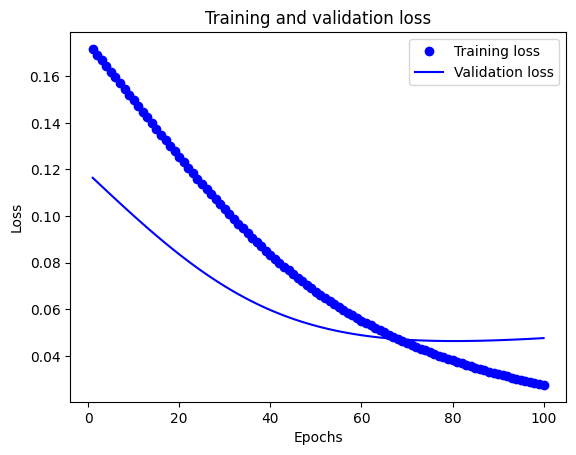

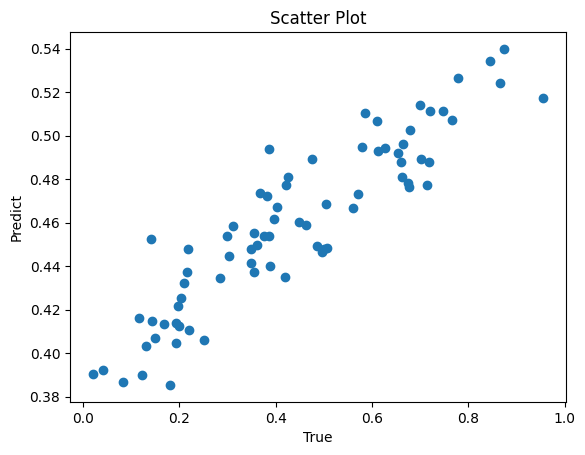

In [75]:
# Visualizing losses and prediction
# DO NOT MODIFY THIS PART

import matplotlib.pyplot as plt

epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.title('Scatter Plot')
plt.xlabel('True')
plt.ylabel('Predict')
plt.scatter(y_test, y_pred)